## Train SVC Model

In [2]:
import numpy as np
import os
import joblib
from collections import Counter


cwd = os.getcwd()
resized_data_path = os.path.join(cwd, 'resized_data_32x32px.joblib')
data = joblib.load(resized_data_path)
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  73139
keys:  ['description', 'label', 'filename', 'data']
description:  resized (32,32) animal images in rgb
image shape:  (32, 32, 3)
labels: ['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '5' '6' '7' '8' '9']


Counter({'32': 450,
         '35': 2280,
         '34': 780,
         '33': 1288,
         '20': 660,
         '18': 2280,
         '27': 450,
         '9': 2790,
         '0': 451,
         '11': 2490,
         '7': 2730,
         '29': 510,
         '16': 780,
         '42': 450,
         '6': 780,
         '28': 1020,
         '17': 2100,
         '1': 4920,
         '10': 3810,
         '19': 390,
         '26': 1140,
         '8': 2670,
         '21': 600,
         '38': 3930,
         '36': 720,
         '31': 1470,
         '30': 840,
         '37': 390,
         '39': 570,
         '41': 450,
         '24': 510,
         '23': 960,
         '4': 3750,
         '15': 1170,
         '3': 2670,
         '12': 3990,
         '40': 660,
         '2': 2610,
         '13': 4080,
         '5': 3510,
         '14': 1470,
         '22': 720,
         '25': 2850})

In [3]:
import pandas as pd

label = pd.read_csv('labels.csv')
label.head()

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


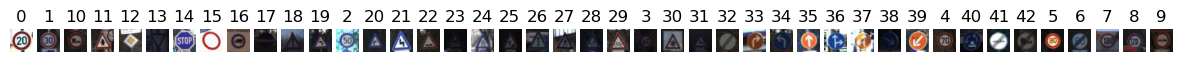

In [27]:
import matplotlib.pyplot as plt
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
# fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [1]:
import joblib
X_train_prepared = joblib.load('x_train_prepared_data.joblib')
X_test_prepared = joblib.load('x_test_prepared_data.joblib')
y_test = joblib.load('y_test_data.joblib')
y_train = joblib.load('y_train_data.joblib')
X_train_prepared, X_test_prepared

(array([[ 2.04557927, -0.2749248 , -0.86596841, ..., -0.77128054,
          0.28480901,  0.01399857],
        [ 0.34575296,  0.89956562,  0.84809213, ..., -0.90885167,
         -1.40392052, -1.43872944],
        [ 1.20050409,  0.89991056,  0.84840783, ..., -1.21920173,
         -0.77627834,  0.20426867],
        ...,
        [ 1.48605832, -1.18089428, -0.90964312, ..., -0.2483018 ,
         -0.85697608, -0.90000507],
        [ 0.62921892,  0.8697146 , -0.19918241, ..., -1.24124101,
         -1.14107323,  0.94350768],
        [-0.26545261,  0.11537739, -0.10745928, ..., -0.27473827,
          1.06102355,  0.89906885]]),
 array([[-0.9902563 , -0.42091438,  0.94058309, ..., -1.19668327,
         -1.06608467,  1.06933816],
        [ 1.25747911, -0.70018413,  0.92018635, ..., -0.94743678,
         -1.24674432, -2.33624921],
        [-1.74841658, -0.57249161,  1.26519766, ...,  1.45724191,
         -0.23505184, -0.52478121],
        ...,
        [ 1.52170326, -0.38965662, -1.5779162 , ...,  

In [37]:
# linear SVC
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score,classification_report

clf = SVC(kernel='linear', C=10)
clf.fit(X_train_prepared, y_train)
print(f'training_accuracy for C=10: {clf.score(X_train_prepared, y_train)}\n')

training_accuracy for C=0.1: 0.6637384423441746



In [41]:
y_pred = clf.predict(X_test_prepared)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.62      0.61        78
           1       0.48      0.66      0.56       979
          10       0.58      0.68      0.63       786
          11       0.50      0.62      0.56       497
          12       0.93      0.95      0.94       810
          13       0.99      0.99      0.99       812
          14       0.77      0.73      0.75       298
          15       0.55      0.40      0.46       243
          16       0.77      0.80      0.78       168
          17       0.94      0.96      0.95       425
          18       0.68      0.78      0.73       460
          19       0.49      0.49      0.49        86
           2       0.41      0.25      0.31       533
          20       0.68      0.64      0.66       122
          21       0.70      0.71      0.70       113
          22       0.62      0.72      0.67       138
          23       0.62      0.62      0.62       208
          24       0.58    

In [2]:
# linear SVC
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score,classification_report

clf = SVC(kernel='linear', C=100)
clf.fit(X_train_prepared, y_train)
print(f'training_accuracy for C=100: {clf.score(X_train_prepared, y_train)}\n')

training_accuracy for C=10: 0.6648664353711268



In [3]:
import joblib
C=100
outfile = f'linear_svc_{C}.joblib'
joblib.dump(clf, outfile)

['linear_svc_100.joblib']

In [4]:
y_preds = clf.predict(X_test_prepared)

print(f'classification report for C=100: \n')
print(classification_report(y_test, y_preds))

classification report for C=100: 

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        78
           1       0.48      0.66      0.56       979
          10       0.58      0.69      0.63       786
          11       0.50      0.63      0.56       497
          12       0.93      0.94      0.94       810
          13       0.99      0.99      0.99       812
          14       0.76      0.73      0.75       298
          15       0.55      0.40      0.46       243
          16       0.78      0.80      0.79       168
          17       0.95      0.96      0.95       425
          18       0.68      0.78      0.73       460
          19       0.49      0.47      0.48        86
           2       0.41      0.26      0.32       533
          20       0.67      0.64      0.65       122
          21       0.70      0.71      0.70       113
          22       0.62      0.72      0.67       138
          23       0.62      0.61      0.61   

In [ ]:
# linear SVC
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score,classification_report

clf = SVC(kernel='linear', C=1000)
clf.fit(X_train_prepared, y_train)
print(f'training_accuracy for C=1000: {clf.score(X_train_prepared, y_train)}\n')

In [ ]:
import joblib

outfile = f'linear_svc_1000.joblib'
joblib.dump(clf, outfile)

In [ ]:
y_preds = clf.predict(X_test_prepared)

print(f'classification report for C=1000: \n')
print(classification_report(y_test, y_preds))

In [ ]:
# Since linear svc takes much longer time to train and did't perform very well compared to rbf and poly model, I will stop here.